# 4. 신경망 학습

- **학습** : 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것
- **손실 함수** : 신경망이 학습할 수 있도록 해주는 **지표**  
→ 손실 함수의 값을 가급적 작게 만드는 기법 = 함수의 기울기를 활용하는 경사법

## 4.1 데이터에서 학습한다!

- 신경망의 특징 : **가중치 매개변수의 값**을 데이터를 보고 자동으로 결정한 뒤 학습할 수 있음  
→ 데이터로부터 매개 변수의 값을 자동으로 정하는 것 중요  
  
※ 선형 분리 가능 : 유한 번의 학습을 통해 해결 가능 ← **퍼셉트론의 수렴 정리**로 증명됨  
※ 비선형 분리 문제 : 자동으로 학습 불가능

###4.1.1 데이터 주도 학습

- **기계학습** : 사람의 개입 최소화하고 수집한 **데이터**로부터 패턴을 찾으려 시도함 
   
< 기계학습의 두 가지 접근법 >
1. 특징과 기계학습을 활용한 접근에도 문제에 따라서는 **사람**이 적절한 특징 생각해야 함
2. 중요한 특징까지도 **기계**가 스스로 학습  
→ **딥러닝**(=**종단간(end-to-end)** 기계학습) : 데이터(입력)에서 목표한 결과(출력)를 사람의 개입 없이 얻음

In [ ]:
# 구글 드라이브와 연결
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


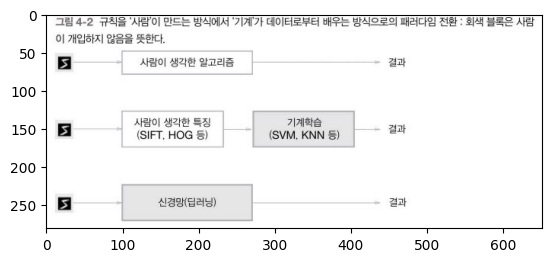

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/기계학습2접근법.JPG')  # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

### 4.1.2 훈련 데이터와 시험 데이터

- **훈련 데이터**와 **시험 데이터**로 나누는 이유 : **범용 능력**을 제대로 평가하기 위해서  
→ **범용 능력** : 아직 보지 못한 데이터로도 문제를 올바르게 풀어내는 능력  
- **오버피팅(과적합)** : 한 데이터 세트에만 지나치게 최적화된 상태  
→ 기계학습은 오버피팅을 피해야 함 

## 4.2 손실 함수

신경망 학습은 현재의 상태를 나타내는 **하나의 지표**를 기준으로 최적의 매개변수 값을 탐색  
→ **손실 함수** : 신경망 성능의 '나쁨'을 나타내는 지표로, 현재의 신경망이 훈련 데이터를 얼마나 잘 처리하지 **못**하느냐를 나타냄  
→ 일반적으로 **오차제곱합**과 **교차 엔트로피 오차**를 사용함

### 4.2.1 오차제곱합

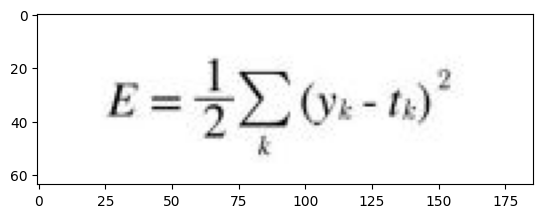

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/오차제곱합.JPG')  # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

- y_k : 신경망의 출력 (신경망이 추정한 값)
- t_k : 정답 레이블
- k : 데이터의 차원 수

In [ ]:
import numpy as np

# y_k와 t_k는 원소 10개짜리 데이터
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]        # 신경망의 출력 y = 소프트맥스 함수의 출력 → 확률로 해석 가능
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]                              # 정답 레이블 t = 정답을 가리키는 위치의 원소는 1로, 그 외에는 0으로 표기

- **원-핫 인코딩** : 한 원소만 1로 하고 그 외는 0으로 나타내는 표기법

- **오차제곱합** : 각 원소의 출력(추정값)과 정답 레이블(참값)의 차를 제곱한 후의 총합

In [ ]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [ ]:
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1 : '2'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mse = sum_squares_error(np.array(y), np.array(t))
print('첫 번째 예의 오차 :', mse)  # 0.0975


# 예2 : '7'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mse = sum_squares_error(np.array(y), np.array(t))
print('두 번째 예의 오차 :',mse)  # 0.5975

첫 번째 예의 오차 : 0.09750000000000003
두 번째 예의 오차 : 0.5975


오차제곱합 기준으로는 첫 번째 예의 추정 결과가 오차가 더 작으므로 정답에 더 가까울 것으로 판단 가능

### 4.2.2 교차 엔트로피 오차

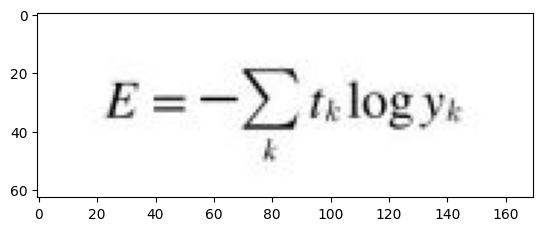

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/교차엔트로피오차.JPG')  # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

- log : 자연로그 (log_e)
- y_k : 신경망의 출력
- t_k : 정답 레이블(원-핫 인코딩)
- k : 데이터의 차원 수  
  
실질적으로 정답일때의 추정의 자연로그를 계산하는 식이 됨  
→ 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정함

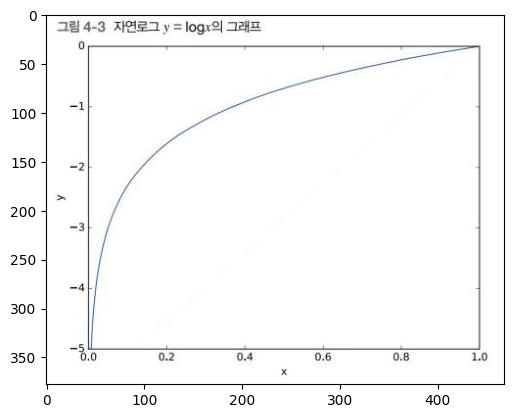

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/자연로그.JPG')  # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

- x(정답에 해당하는 출력)가 1일 때 y는 0이 되고, x(정답에 해당하는 출력)가 0에 가까워질수록 y값은 점점 작아짐  
→ **정답일 때의 출력이 작아질수록 오차는 커짐**
  
※ 정답이 아닌 나머지 모두는 t_k가 0이므로, log y_k와 곱해도 0이 되어 결과에 영향 주지 않음

In [ ]:
def cross_entropy_error(y, t):              # y와 t는 넘파이 배열
    delta = 1e-7                            # 0일때 - 무한대가 되지 않기 위해 작은 값을 더함 ← - 무한대가 되면 더 이상 계산 진행 안 됨
    return -np.sum(t * np.log(y + delta))

In [ ]:
# 동일한 계산 → 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1 : 정답일 때의 출력이 0.6인 경우
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cee = cross_entropy_error(np.array(y), np.array(t))
print('첫 번째 예의 교차 엔트로피 오차 :', cee)  # 0.510825457099

# 예2 : 정답일 때의 출력이 0.1인 경우
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cee = cross_entropy_error(np.array(y), np.array(t))
print('두 번째 예의 교차 엔트로피 오차 :', cee)  # 2.30258409299

첫 번째 예의 교차 엔트로피 오차 : 0.510825457099338
두 번째 예의 교차 엔트로피 오차 : 2.3025840929945454


결과(오차 값)가 더 작은 첫 번째 추정이 정답일 가능성이 높다고 판단

### 4.2.3 미니배치 학습

훈련 데이터에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개변수 찾기  
→ 모든 훈련 데이터를 대상으로 손실 함수 값을 구해야 함

< 교차 엔트로피 오차의 합을 구하는 법 >   
→ 훈련 데이터 전체에 대한 오차함수

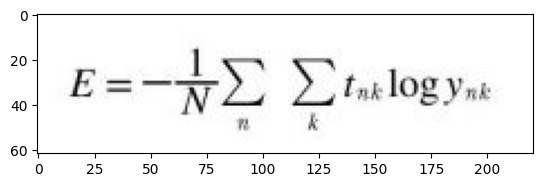

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/손실함수합.JPG')  # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

- N : 데이터의 개수
- y_nk : 신경망의 출력
- t_nk : n번째 데이터의 k번째 값 (정답 레이블)
  
→ 데이터 하나에 대한 손실함수를 단순히 N개의 데이터로 확장한 것  
→ N으로 나누어 정규화  
(**평균 손실 함수** 구하기 : 평균을 구해 사용하면 훈련 데이터 개수에 관계없이 언제든 통일된 지표 얻을 수 있음)

※ 훈련 데이터 전체에 대한 손실 함수를 계산하기에는 시간이 오래걸리기 때문에 일부를 추려 전체의 근사치로 이용 가능.

- **미니배치** : 훈련 데이터로부터 뽑은 일부
- **미니배치 학습** : 훈련 데이터 중에서 무작위로 일부를 뽑아 그 일부만을 사용해 학습하는 방법

In [ ]:
import numpy as np
import sys
import os

sys.path.append('/content/drive/My Drive/CUAI_딥러닝/')                 # 구글 드라이브 경로 추가
# sys.path.append(os.pardir)                                           # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist                                   # dataset.mnist의 load_mnist 함수를 임포트

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)                    # 호출 시 one_hot_label=True로 지정해 원-핫 인코딩으로, 정답 위치의 원소만 1이고 나머지가 0인 배열 얻음 

print('(훈련 데이터, 입력데이터)인 이미지 데이터 :', x_train.shape)   # (60000, 784)
print('(훈련 데이터, 정답레이블) :', t_train.shape)  # 원-핫 인코딩 된 정답 레이블 (60000, 10)

(훈련 데이터, 입력데이터)인 이미지 데이터 : (60000, 784)
(훈련 데이터, 정답레이블) : (60000, 10)


- **np.random.choice( )** : 지정한 범위의 수 중에서 무작위로 원하는 개수만 꺼낼 수 있음

In [ ]:
# np.random.choice()를 이용해 훈련 데이터에서 무작위 10개 추출
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [ ]:
np.random.choice(60000, 10)         # 0 이상 60000 미만의 수 중에서 무작위로 10개 추출

array([10895, 10729, 35242, 21748, 27173,  6908,  8768, 21014,  8723,
       31080])

※ **미니배치** : 전체 훈련 데이터의 대표로서 무작위로 선택한 작은 덩어리를 사용하는 것

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

데이터가 하나인 경우, 교차 엔트로피 오차 (**데이터를 하나씩 처리하는 구현**) 구하기

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:                                     # y가 1차원이라면(데이터 하나당 교차 엔트로피 오차를 구하는 경우), reshape 함수로 데이터의 형상을 변형함
        t = t.reshape(1, t.size)                        # t : 정답 레이블
        y = y.reshape(1, y.size)                        # y : 신경망의 출력

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size   # 배치의 크기로 나눠 정규화 = 이미지 1장당 평균의 교차 엔트로피 오차 계산

데이터가 배치로 묶여 입력될 경우, 모두 처리하기

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)                                            # 원-핫 인코딩일 때 t가 0인 원소는 교차 엔트로피 오차도 0이므로, 계산 무시 가능 → 정답에 해당하는 신경망의 출력만으로 교차 엔트로피 오차 계산 가능
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y[np.arange(batch_size), t])) / batch_size    # 원-핫 인코딩 시, t * np.log(y)는 np.log(y[np.arange(batch_size),t])로 구현

< np.log(y[np.arange(batch_size),t]) >
- **np.arange(batch_size)** : 0 부터 batch_size - 1 까지 배열 생성
- **y[np.arange(batch_size),t]** : 각 데이터의 정답 레이블에 해당하는 신경망의 출력 추출

### 4.2.5 왜 손실 함수를 설정하는가?

신경망 학습에서 최적의 매개변수(가중치와 편향)를 탐색할 때 손실 함수의 값을 최대한 작게 하는 매개변수 값 찾아야 함  
→ 매개변수의 미분(=기울기) 계산하고 그 미분 값을 단서로 매개변수 값 서서히 갱신  
  
- 손실함수의 **미분** : 가중치 매개변수의 값을 아주 조금 변화시켰을 때, 손실함수가 어떻게 변하는가를 의미  
→ **기울기가 0이 되지 않아야** 신경망이 올바르게 학습 가능

높은 **정확도**를 끌어내는 매개 변수 값을 찾기 위해 손실 함수 사용  
하지만 신경망을 학습할 때 정확도를 지표로 삼아서는 안 됨.  
→ 정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문.  
→ 정확도는 **계단함수처럼** 매개변수의 미소한 변화에는 거의 반응을 보이지 않고 그 값이 불연속적으로 변화함 

## 4.3 수치 미분

- **경사법**은 기울기(경사) 값을 기준으로 나아갈 방향 결정

### 4.3.1 미분

- **미분** : **특정 순간**의 변화량을 표기

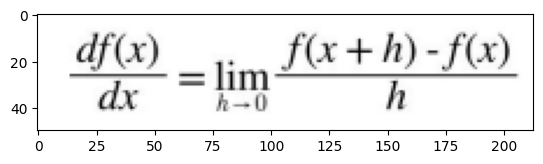

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/미분.PNG')       # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

- 좌변 : f(x)의 x에 대한 미분(x에 대한 f(x)의 변화량)을 나타내는 기호  
→ x의 **작은 변화**가 함수 f(x)를 얼마나 변화시키느냐를 의미

In [ ]:
import numpy as np
import matplotlib.pylab as plt

# 나쁜 구현 예
def numerical_diff_bad(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h

< 개선해야 할 점 >
1. h값이 너무 작아 반올림 오차를 일으킬 수 있음. 10e-4정도가 적당하다고 알려짐  
→ **반올림 오차** : 작은 값(소수점 8자리 이하)이 생략되어 최종 계산 결과에 생기는 오차


In [ ]:
np.float32(1e-50)

0.0

2. 전방 차분((x+h)와 x의 차분)에서는 차분이 0이 될 수 없어 오차가 발생 = 진정한 미분과는 엄밀히 일치하지 않음  
→ 오차를 줄이기 위해 **중심(중앙) 차분**을 사용

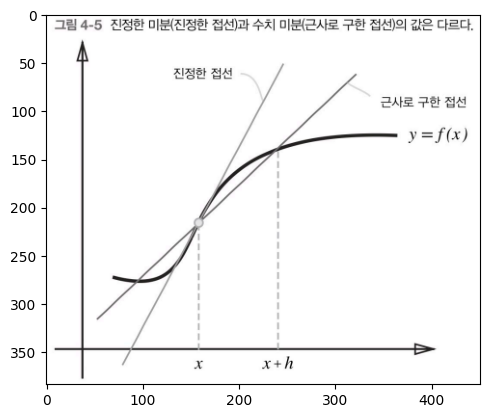

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/전방차분.PNG')       # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

In [ ]:
def numerical_diff(f, x):
    h = 10e-4
    return (f(x + h) - f(x - h)) / (2 * h)

- **수치 미분** : 아주 작은 차분으로 미분하는 것 = **근사치**로 계산하는 방법
- **해석적 미분** : 수식을 전개해 미분하는 것 = 진정한 미분

### 4.3.2 수치 미분의 예

- y = 0.01x² + 0.1x 를 구현

In [ ]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

- f(x) = 0.01x² + 0.1x 의 그래프 그리기

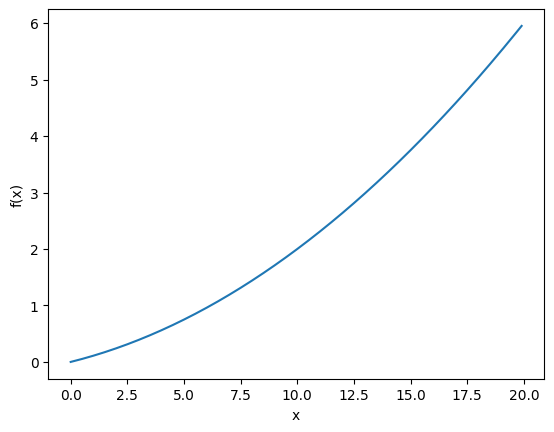

In [ ]:
x = np.arange(0.0, 20.0, 0.1)  # 0에서 20까지 간격 0.1인 배열 x를 만든다.
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [ ]:
# x = 5, 10일때 미분
print('x = 5 일 때의 미분 값 :', numerical_diff(function_1, 5))   # 0.200000000000089
print('x = 10 일 때의 미분 값 :', numerical_diff(function_1, 10))  # 0.29999999999996696

x = 5 일 때의 미분 값 : 0.200000000000089
x = 10 일 때의 미분 값 : 0.29999999999996696


- x = 5 일 때의 **진정한 미분** : 0.2
- x = 10 일 때의 **진정한 미분** : 0.3  
→ 수치 미분 값과 해적적 미분 값를 비교했을 때 오차가 매우 작아서 거의 같은 값이라 할 수 있음

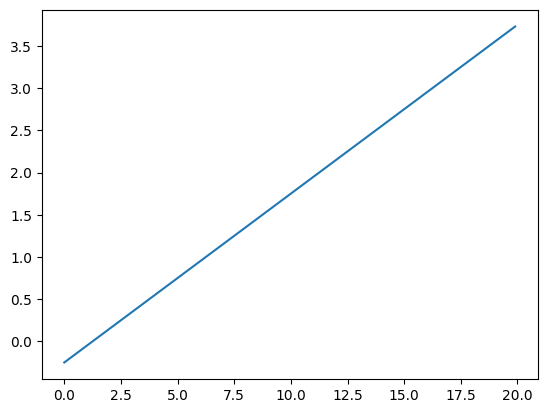

In [ ]:
# 접선의 함수를 구하는 함수
def tangent_line(f, x):
        d = numerical_diff(f, x)
        # print(d)
        y = f(x) - d*x
        return lambda t: d*t + y


tf = tangent_line(function_1, 5)
y2 = tf(x)
plt.plot(x, y2)
plt.show()

### 4.3.3 편미분

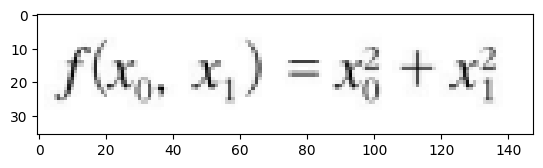

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/편미분.PNG')       # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

In [ ]:
def function_2(x):              # x는 넘파이 배열이라 가정
    return x[0]**2 + x[1]**2    # 넘파이 배열의 각 원소를 제곱하고 그 합을 구함
    # 또는 return np.sum(x**2)

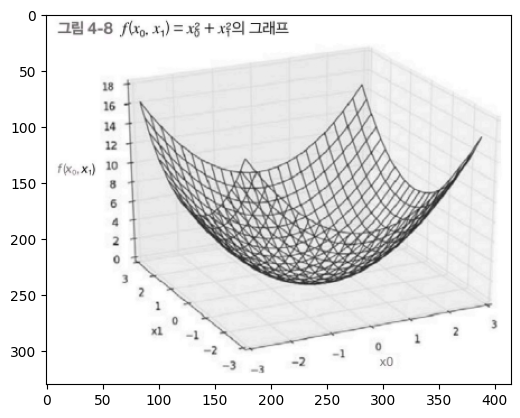

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/편미분그래프.PNG')       # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

- **편미분** : 변수가 여럿인 함수에 대한 미분  
→ 어느 변수에 대한 미분이냐를 구별해야 함  
(변수 중 목표 변수 하나에 초점을 맞추고 다른 변수 값은 고정한 채 특정 장소의 기울기 구하기)

In [ ]:
# x0 = 3, x1 = 4일 때, x0에 대한 편미분을 구하라.
def function_tmp1(x0):
    return x0**2 + 4.0**2.0

print('x0에 대한 편미분 :', numerical_diff(function_tmp1, 3.0))  # 5.999999999998451

x0에 대한 편미분 : 5.999999999998451


In [ ]:
# x0 = 3, x1 = 4일 때, x1에 대한 편미분을 구하라.
def function_tmp2(x1):
    return 3.0**2.0 + x1 * x1

print('x1에 대한 편미분 :', numerical_diff(function_tmp2, 4.0))  # 8.000000000000895

x1에 대한 편미분 : 8.000000000000895


## 4.4 기울기

**기울기** : 모든 변수의 편미분을 벡터로 정리한 것  
→ x0, x1의 편미분을 동시에 계산하려고 할 때, 양쪽의 편미분을 묶어 벡터로 정리한 것을 기울기(gradient)라고 함

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def numerical_gradient(f, x):                   # 변수가 하나일 때의 수치 미분과 비슷 → f는 함수이고 x는 넘파이 배열이므로 넘파이 배열 x의 각 원소에 대해 수치 미분을 구함
    h = 1e-4
    grad = np.zeros_like(x)                     # x와 형상이 같은 배열(원소가 모두 0인 배열)을 생성

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val                        # 값 복원

    return grad

In [ ]:
# f(x0, x1) = x0² + x1²
def function_2(x):
    return x[0]**2 + x[1]**2
    # or return np.sum(x**2)

In [ ]:
print('(3, 4)에서의 기울기 :', numerical_gradient(function_2, np.array([3.0, 4.0])))  # [ 6.  8.]
print('(0, 2)에서의 기울기 :', numerical_gradient(function_2, np.array([0.0, 2.0])))  # [ 0.  4.]
print('(3, 0)에서의 기울기 :', numerical_gradient(function_2, np.array([3.0, 0.0])))  # [ 6.  0.]

(3, 4)에서의 기울기 : [6. 8.]
(0, 2)에서의 기울기 : [0. 4.]
(3, 0)에서의 기울기 : [6. 0.]


기울기가 함수의 **가장 낮은 장소(최솟값)**을 가리킴 & 최솟값에서 **멀어질수록 화살표의 크기가 커짐**  
→ **기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향**

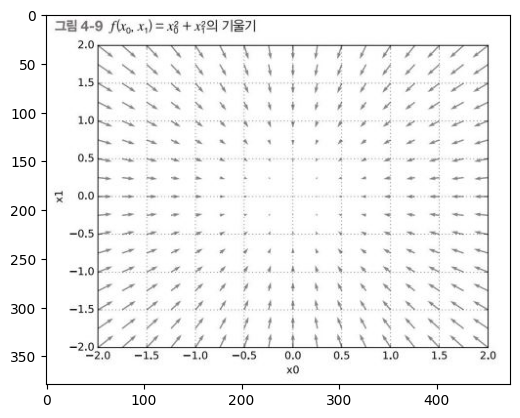

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/기울기.JPG')       # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

### 4.4.1 경사법(경사 하강법)

신경망은 손실 함수가 최솟값이 될 때의 최적의 매개변수를 학습 시 찾음  
→ 최솟값을 **경사법**을 활용하여 찾음.  
※ 주의점 : 기울어진 방향이 꼭 최솟값을 가리키는 것은 아님. 그러나 그 방향으로 가야 함수의 값을 줄일 수 있음  
→ 극솟값(한정 범위에서의 최솟값), 최솟값, 안장점(어느 방향에서 보느냐에 따라 극댓값 또는 극솟값이 되는 점)에서는 기울기 0  
→ 복잡하고 찌그러진 모양의 함수라면 평평한 곳으로 파고들면서 **고원**이라는 학습 정체기에 빠질 수 있음  
  
- **경사법** : 현 위치에서 기울어진 방향으로 일정 거리만큼 이동하여 함수의 값을 점차 줄이는 방법
1. 경사 하강법(gradient descent method) : 최솟값 찾기
2. 경사 상승법(gradient ascent method) : 최댓값 찾기


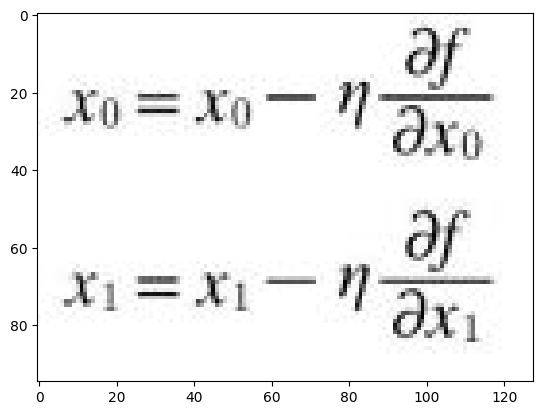

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/경사법.JPG')       # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

- **η**(에타) : 갱신하는 양, 학습률(learning rate)  
→ 한 번의 학습으로 얼마만큼 학습해야 할지(매개변수 값을 얼마나 갱신하는냐를) 정하는 것

- 변수의 값을 갱신하는 단계를 여러 번 반복하면서 서서히 함수의 값을 줄이는 것


In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

- **f** : 최적화하려는 함수
- **init_x** : 초깃값
- **lr**(learning rate) : 학습률
- **step_num** : 경사법에 따른 반복 횟수
  
→ **numerical_gradient(f, x)** : 함수의 **기울기**  
x = (학습률 * 기울기) 갱신을 step_num번 반복함으로써 함수의 극솟값 / 최솟값을 구함

In [ ]:
# 경사법으로 f(x0, x1) = x0² + x1²의 최솟값을 구해라
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=0.1, step_num=100)
print(x)  # [ -6.11110793e-10   8.14814391e-10] → (0,0)에 가까운 결과

[-6.11110793e-10  8.14814391e-10]


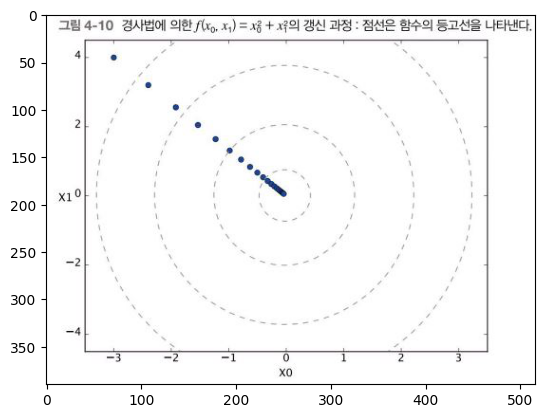

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/경사법갱신과정그래프.JPG')       # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

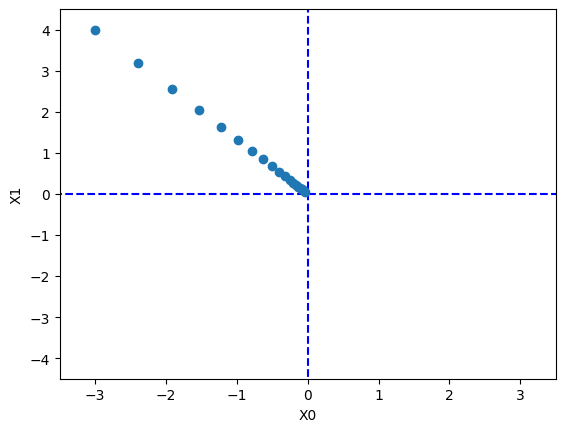

In [ ]:
# 그래프
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=0.1, step_num=20)

plt.plot([-5, 5], [0, 0], '--b')
plt.plot([0, 0], [-5, 5], '--b')
plt.plot(x_history[:, 0], x_history[:, 1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

- 하이퍼 파라미터이기 때문에 사람이 직접 설정해야 하는 매개변수.  
- 학습률이 너무 크거나 작으면 좋은 결과를 얻을 수 없음  
→ 너무 크면 큰 값으로 발산하고 너무 작으면 갱신되지 않은 채 끝남.

In [ ]:
# 학습률이 너무 큼 : lr = 10.0
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=10.0)
print(x)  # [ -2.58983747e+13  -1.29524862e+12] 발산함

# 학습률이 너무 작음 : lr = 1e-10
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=1e-10)
print(x)  # [-2.99999994  3.99999992] 거의 변화 없음

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


### 4.4.2 신경망에서의 기울기

- **신경망에서의 기울기** : 가중치 매개변수 W에 관한 손실 함수의 기울기. 각각 원소에 대한 편미분

simpleNet 클래스 활용해 W, predict, 최댓값 인덱스, 정답레이블 구하기

In [ ]:
import sys
import os
import numpy as np
sys.path.append('/content/drive/My Drive/CUAI_딥러닝')                 # 구글 드라이브 경로 추가
# sys.path.append(os.pardir)
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


# 4.4.2 신경망에서의 기울기
class simpleNet:
    """docstring for simpleNet"""
    def __init__(self):
        self.W = np.random.randn(2, 3)                                 # 정규분포로 초기화

    def predict(self, x):                                              # 예측 수행
        return np.dot(x, self.W)

    def loss(self, x, t):                                              # 손실 함수의 값을 구함 (x : 입력 데이터, t : 정답 레이블)
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [ ]:
net = simpleNet()
print(net.W)  # 가중치 매개변수(랜덤)

[[-0.84872416 -1.46655391 -0.65402908]
 [-0.27391708 -1.08998038 -0.88667394]]


In [ ]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-0.75575986 -1.86091469 -1.190424  ]


In [ ]:
print(np.argmax(p))  # 최댓값의 인덱스

0


In [ ]:
t = np.array([0, 0, 1])  # 정답 레이블
print(net.loss(x, t))

1.1170747334699547


Numerical_gradient(f,x) 써서 기울기(gradient) 구하기
- dL / dW11 = 0.30323833 → W11을 h만큼 늘리면 손실함수는 약 0.3 만큼 증가  
= 손실함수를 줄이려면 **음의 방향**으로 갱신해야 함
- dL / dW23 = -0.60548792 → W23을 h만큼 늘리면 손실함수는 약 -0.6 만큼 감소  
= 손실함수를 줄이려면 **양의 방향**으로 갱신해야 함

In [ ]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.30323833  0.10042029 -0.40365861]
 [ 0.45485749  0.15063043 -0.60548792]]


똑같은 방식으로 lambda 표현 가능

In [ ]:
f = lambda w : net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.30323833  0.10042029 -0.40365861]
 [ 0.45485749  0.15063043 -0.60548792]]


## 4.5 학습 알고리즘 구현하기

전제 : 신경망에는 적응 가능한 가중치 & 편향이 있고, 이를 데이터에 적응하도록 조정하는 것이 **학습**

1. 훈련 데이터 중 일부를 무작위로 가져온다. 미니배치의 손실 함수 값을 줄이는 것이 목표

2. 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구함.  
기울기는 손실함수의 값을 가장 작게 하는 방향을 제시.

3. 가중치 매개변수를 기울기 방향으로 갱신한다.

→ 경사하강법으로 매개변수 갱신  
→ 데이터를 미니배치로 무작위 선정하기 때문에 **확률적 경사하강법(SGD)**라고 부름

### 4.5.1 2층 신경망 클래스 구현하기

< 2층 신경망 클래스 구현하기 >  
**TwoLayerNet** 클래스 : 딕셔너리인 params와 grads를 인스턴스 변수로 갖음

- Params 변수 : Params['W1']은 1번째 층의 가중치 매개변수로 넘파이 배열로 저장됨. 예측 처리(순방향 처리)에서 사용됨

```
x = np.random.rand(100, 784)   # 더미 입력 데이터(100장분량) (0 또는 1만가지는 범주형 데이터)
y = net.predict(x)
```

- Grads 변수 : Numerical_gradient() 메서드를 사용해 기울기를 계산하면 grabs에 기울기 정보 저장됨




In [ ]:
import sys, os
import numpy as np
sys.path.append('/content/drive/My Drive/CUAI_딥러닝')                                      # 구글 드라이브 경로 추가
# sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):         # input_size: 입력층의 뉴런수, hidden_size: 은닉층의 뉴런수, output_size: 출력층의 뉴런수
        # 가중치 초기화
        self.params = {}                                                                    # 변수 params : 신경망의 매개변수를 보관하는 딕셔너리
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)      # params['W1'] : 1번째 층의 가중치
        self.params['b1'] = np.zeros(hidden_size)                                           # params['b1'] : 1번째 층의 편향
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)     # params['W2'] : 2번째 층의 가중치
        self.params['b2'] = np.zeros(output_size)                                           # params['b2'] : 2번째 층의 편향

    def predict(self, x):                                                                   # predict(x) 메소드 - 예측
        W1, W2 = self.params['W1'], self.params['W2']   
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):                                                                   # loss(x,t) 메소드 – 손실함수값 구하기(=predict()결과와 정답 레이블을 바탕으로 교차 엔트로피 오차 구하기)
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):                                                               # accuracy(self, x, t) - 정확도 : Y와 t의 가장 높은 정확도
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):                                                     # numerical_gradient(self, x, t) – 각 메서드의 가중치 매개변수의 기울기를 구함
        loss_W = lambda W: self.loss(x, t)

        grads = {}                                                                          # 변수 grads : 기울기를 보관하는 딕셔너리
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])                         # grads['W1'] : 1번째 층의 가중치
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])                         # grads['b1'] : 1번째 층의 편향
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])                         # grads['W2'] : 2번째 층의 가중치
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])                         # grads['b2'] : 2번째 층의 편향

        return grads

In [ ]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print('1번째 층의 가중치 :', net.params['W1'].shape)    # (784,100)
print('1번째 층의 편향 :', net.params['b1'].shape)      # (100,)
print('2번째 층의 가중치 :', net.params['W2'].shape)    # (100, 10)
print('2번째 층의 편향 :', net.params['b2'].shape)      # (10,)

1번째 층의 가중치 : (784, 100)
1번째 층의 편향 : (100,)
2번째 층의 가중치 : (100, 10)
1번째 층의 편향 : (10,)


In [ ]:
x = np.random.rand(100, 784)    # 더미 입력 데이터(100장 분량)
y = net.predict(x)

In [ ]:
x = np.random.rand(100, 784)    # 더미 입력 데이터(100장 분량)
t = np.random.rand(100, 10)     # 더미 정답 레이블(100장 분량)

grads = net.numerical_gradient(x, t)        # 기울기 계산

print('1번째 층의 가중치 :', grads['W1'].shape)     # (784, 100)
print('1번째 층의 편향 :', grads['b1'].shape)       # (100,)
print('2번째 층의 가중치 :', grads['W2'].shape)     # (100, 10)
print('2번째 층의 편향 :', grads['b2'].shape)       # (10,)

1번째 층의 가중치 : (784, 100)
1번째 층의 편향 : (100,)
2번째 층의 가중치 : (100, 10)
2번째 층의 편향 : (10,)


In [ ]:
def gradient(self, x, t):                                                       # gradient(self, x, t) - 가중치 매개변수의 기울기를 구함. numerical_gradient의 성능 개선판
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num  # ????
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

### 4.5.2 미니배치 학습 구현하기

< 하이퍼 파라미터 >     
- Iters_num : 반복횟수. 경사법에 의한 갱신 횟수는 10,000번으로 설정.
- 미니배치 크기 : 100으로 지정
→ 한번 돌때마다 총 60000개의 훈련 데이터에서 임의로 100개의 데이터를 추려냄.


100개의 미니배치를 대상으로 확률적 경사 하강법을 수행해 매개변수를 갱신.

갱신할 때마다 손실 함수를 계산하고 그 값을 배열에 추가

In [ ]:
import numpy as np
sys.path.append('/content/drive/My Drive/CUAI_딥러닝')                 # 구글 드라이브 경로 추가
# sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼 파라메터
iters_num = 1000                                                      # 반복횟수
train_size = x_train.shape[0]
batch_size = 100                                                      # 미니배치 크기
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    print(i)
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch)  # 다음 장에서 구현할 더 빠른 방법!

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

ModuleNotFoundError: ignored

### 4.5.3 시험 데이터로 평가하기

- 1에폭당 반복 수   
→ **에폭** : 학습에서 훈련 데이터를 모두 소진했을 때의 횟수에 해당.  
→ 훈련데이터 10000개를 100개의 미니배치로 학습할 경우, 100회가 1에폭.

In [ ]:
import numpy as np
import sys
import os
sys.path.append('/content/drive/My Drive/CUAI_딥러닝')                 # 구글 드라이브 경로 추가
# sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=False)

# 하이퍼 파라메터
iters_num = 1000  # 반복횟수
train_size = x_train.shape[0]
batch_size = 100  # 미니배치 크기
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    print(i)
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch)  # 다음 장에서 구현할 더 빠른 방법!

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭 당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | "
              + str(train_acc) + ", " + str(test_acc))

ModuleNotFoundError: ignored

NameError: ignored

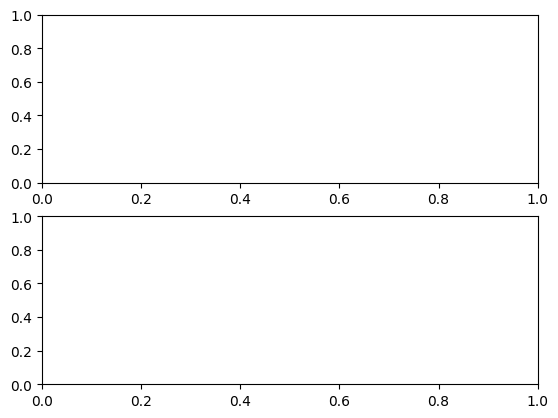

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1)
x = np.array(range(iters_num))

ax1.plot(x, train_loss_list, label='loss')
ax1.set_xlabel("iteration")
ax1.set_ylabel("loss")
ax1.set_ylim(0, 3.0)

ax2.plot(x[:1000], train_loss_list[:1000], label='loss')
ax2.set_xlabel("iteration")
ax2.set_ylabel("loss")
ax2.set_ylim(0, 3.0)

학습 횟수가 늘어나면서 손실 함수의 값이 줄어들고 있음 → 학습이 잘 되고 있다는 것을 의미  
- 위쪽은 10,000회 반복까지의 추이, 아래쪽은 1,000회 반복까지의 추이  
→ 1000회가 10000회의 앞 부분을 확대한 부분임  
→ 1000에서 10000회로 학습 회수(iteration)가 늘어나면서 손실 함수의 값(loss)이 줄어듦  
→ 학습이 잘 되고 있다는 뜻

데이터를 반복해서 학습함으로써 최적 가중치 매개변수로 서서히 다가서고 있음

**<범용 능력>**  
훈련 데이터로 신경망이 잘 학습되고 있음을 알았으면, 오버피팅이 발생하진 않았는지, 다른 데이터셋에서도 올바르게 인식하는지를 확인해야함. 

train, test 정확도에 차이가 없으면 오버피팅 발생하지 않았음을 의미  
→ 오버피팅이 발생하면, 조기 종료(early stopping)를 함으로써 오버피팅 예방 가능  
오버피팅 발생하면 두 그래프 다르다.

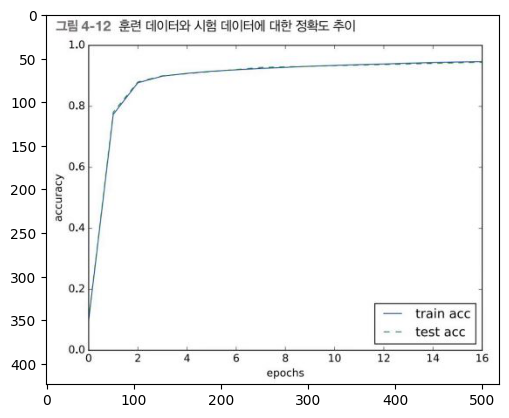

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/훈련데이터와시험데이터정확도추이.JPG')       # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()